## Import Library

In [ ]:
pip install rembg onnxruntime pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00


In [8]:
from rembg import remove
from PIL import Image
from google.colab import files
from IPython.display import Image as IPImage

## Fungsi

In [20]:
# fungsi untuk replace image

def replace_background_with_image (fg_img, bg_img):
  bg_resized = bg_img.resize(fg_img.size)
  return Image.alpha_composite(bg_resized, fg_img)

# fungsi untuk replace warna
def replace_background_with_color (fg_img, color=(255, 105, 180, 255)):
  background = Image.new("RGBA", fg_img.size, color)
  return Image.alpha_composite(background, fg_img)

## Main

In [25]:
# user choice
user_choice = "remove-only" # "replace-image" "remove-only" "replace-color"

# jika pilihannya replace kudu upload gambar dulu
if user_choice == "replace-image":
  print("upload background pengganti:")
  bg_upload = files.upload()
  bg_path = list(bg_upload.keys())[0]
  bg_img = Image.open(bg_path).convert("RGBA")

# upload gambar utamanya
print("upload gambar utama:")
uploaded = files.upload()

for input_path in uploaded.keys():
  inp = Image.open(input_path).convert("RGBA")
  fg = remove(inp)

  if user_choice == "remove-only":
    result = fg
    output_path = input_path.rsplit('.', 1)[0] + '_no_bg.png'

  elif user_choice == "replace-color":
    selected_color = (255, 105, 180, 255)
    result = replace_background_with_color(fg, selected_color)
    output_path = input_path.rsplit('.', 1)[0] + '_with_color_bg.png'

  elif user_choice == "replace-image":
    result = replace_background_with_image(fg, bg_img)
    output_path = input_path.rsplit('.', 1)[0] + '_with_image_bg.png'

upload gambar utama:


Saving WhatsApp Image 2025-05-03 at 18.43.07_23ec7d88.jpg to WhatsApp Image 2025-05-03 at 18.43.07_23ec7d88.jpg


## Simpan dan tampilkan

Before: WhatsApp Image 2025-05-03 at 18.43.07_23ec7d88.jpg


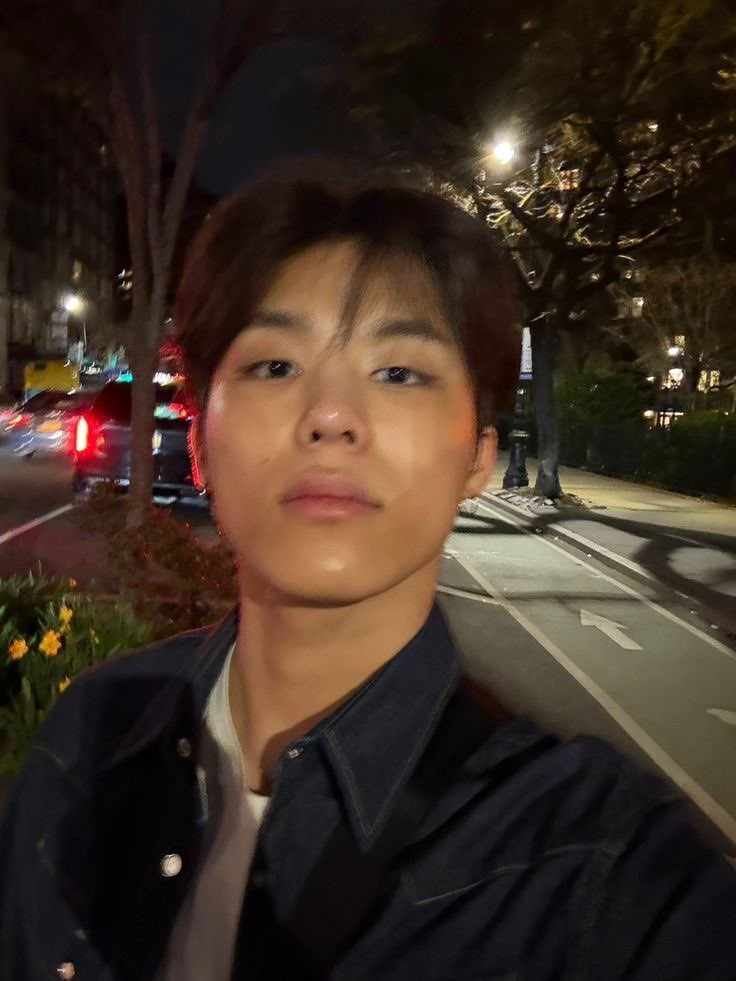

After: WhatsApp Image 2025-05-03 at 18.43.07_23ec7d88_no_bg.png


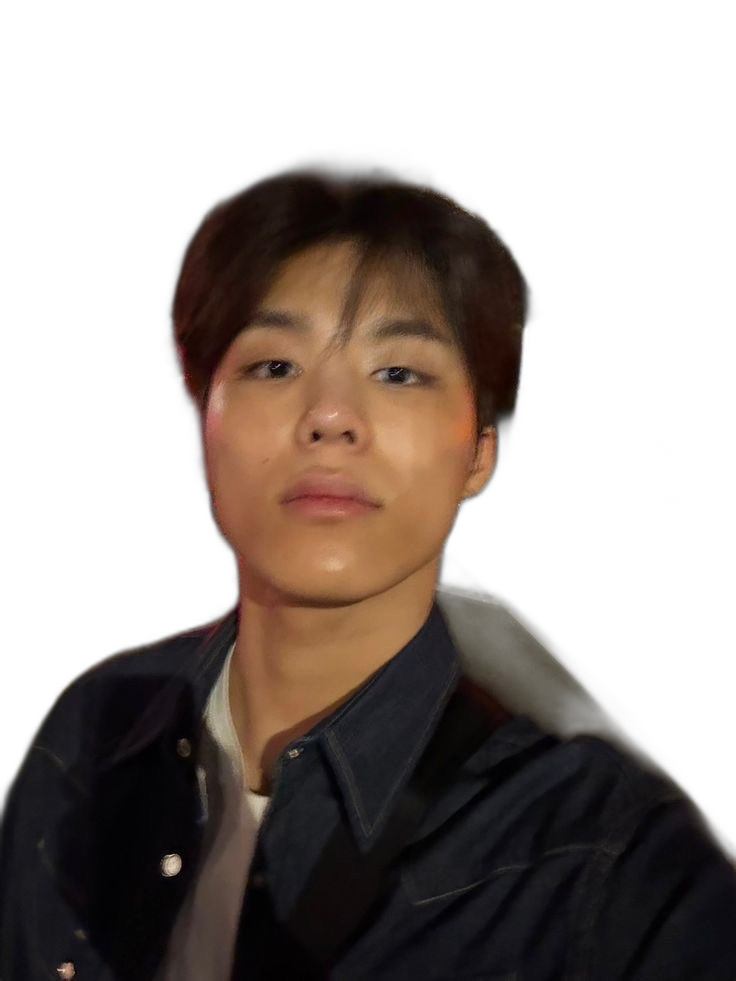

In [26]:
# simpan hasilnya
result.save(output_path)
print(f"Before: {input_path}")
display(inp)
print(f"After: {output_path}")
display(result)